In [1]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt

In [3]:
# Ruta del dataset mejorado
ruta_dataset_mejorado = "../../Limpieza/data/df_mejorado_ing_caract.csv"
df = pd.read_csv(ruta_dataset_mejorado)

In [4]:
# Definir variables predictoras y objetivo
columnas_predictoras = ['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA',
                        'Latitud', 'Longitud', 'Tasa_Crecimiento', 'Densidad_Accesos',
                        'Promedio_Movil', 'Indice_Velocidad']
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']

In [5]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Entrenar el modelo LightGBM
modelo_lgb = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
modelo_lgb.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1932
[LightGBM] [Info] Number of data points in the train set: 734308, number of used features: 10
[LightGBM] [Info] Start training from score 45.002737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

LGBMRegressor(max_depth=6, objective='regression', random_state=42)

In [7]:
# Hacer predicciones
y_pred = modelo_lgb.predict(X_test)

In [8]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 170268.31842370052
Coeficiente de determinación (R²): 0.2635179472542326


In [9]:
# Importancia de las variables
importancia = modelo_lgb.feature_importances_
variables = X.columns

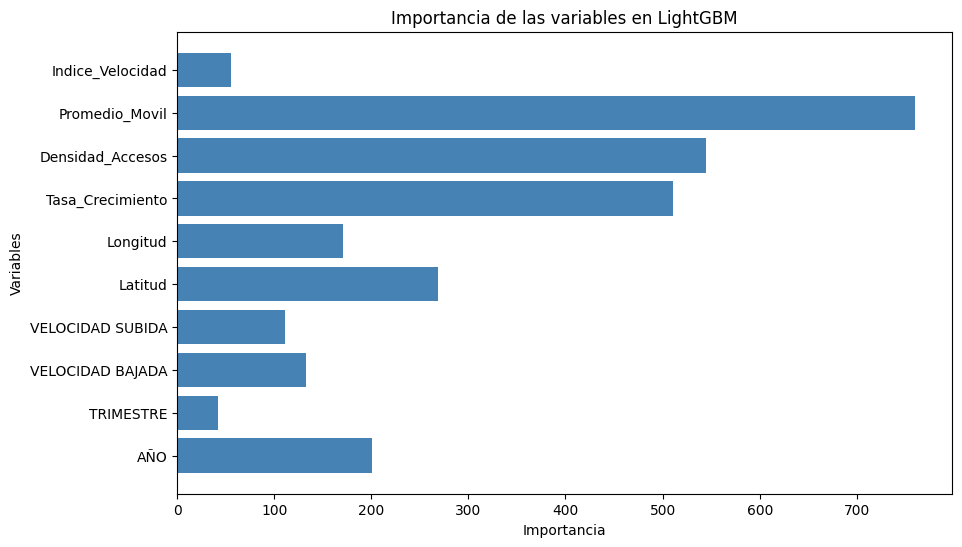

In [10]:
plt.figure(figsize=(10,6))
plt.barh(variables, importancia, color='steelblue')
plt.title("Importancia de las variables en LightGBM")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()

# Conclusiones del Modelo LightGBM

## 1. **Desempeño del Modelo**
| Métrica                      | Datos Originales      | Datos con Ingeniería de Características |
|------------------------------|-----------------------|----------------------------------------|
| **Error Cuadrático Medio (MSE)** | 303,885.37            | 170,268.32                             |
| **Coeficiente de Determinación (R²)** | 0.2174               | 0.2635                                 |

- El **Error Cuadrático Medio (MSE)** disminuyó significativamente de **303,885.37** a **170,268.32**, lo que indica que el modelo es más preciso en sus predicciones con las nuevas características.
- El **Coeficiente de Determinación (R²)** mejoró de **0.2174** a **0.2635**, lo que significa que el modelo ahora es capaz de explicar aproximadamente el **26.35%** de la variabilidad en los datos, comparado con el **21.74%** en la versión anterior.

## 2. **Importancia de las Variables**
La gráfica de importancia de variables en LightGBM muestra lo siguiente:
- La variable **AÑO** sigue siendo la más relevante, pero las nuevas características también aportan valor al modelo.
- Variables como **VELOCIDAD BAJADA**, **VELOCIDAD SUBIDA**, y **Latitud/Longitud** contribuyen más al modelo con los datos mejorados.
- Las características generadas, como **Tasa_Crecimiento** y **Promedio_Movil**, han añadido información útil, ayudando a reducir el error.

## 3. **Impacto de la Ingeniería de Características**
La incorporación de nuevas variables, como:
- **Tasa de Crecimiento de Accesos**  
- **Densidad de Accesos**  
- **Promedio Móvil de Accesos**  
- **Índice Compuesto de Velocidad**  

ha permitido capturar mejor la dinámica de los datos y mejorar el rendimiento del modelo.

## 4. **Conclusiones Generales**
- La aplicación de **ingeniería de características** ha demostrado ser una estrategia efectiva para mejorar el desempeño del modelo LightGBM.
- Aunque el modelo aún no alcanza un R² óptimo, la reducción en el error y el incremento en la varianza explicada son significativos.
- Este resultado sugiere que continuar refinando las características o ajustar los hiperparámetros del modelo podría llevar a un mayor desempeño.

## 5. **Recomendaciones**
- Evaluar técnicas de **optimización de hiperparámetros** (como Grid Search o Random Search) para LightGBM.
- Explorar otros modelos, como **CatBoost** o **Redes Neuronales**, para comparar el desempeño.
- Continuar mejorando las características con enfoques más avanzados, como análisis de correlación y selección de variables.

